In [2]:
import pandas as pd
import numpy as np
from pytz import timezone

events = [
    {"ticker": "io", "start": "2024-06-07", "end": "2024-06-10", "announced": "2024-06-06 13:36"},
    {"ticker": "not", "start": "2024-05-13", "end": "2024-05-15", "announced": "2024-05-10 00:25"},
    {"ticker": "rez", "start": "2024-04-24", "end": "2024-04-29", "announced": "2024-04-23 19:22"},
    {"ticker": "omni", "start": "2024-04-13", "end": "2024-04-16", "announced": "2024-04-12 14:52"},
    {"ticker": "saga", "start": "2024-04-05", "end": "2024-04-08", "announced": "2024-04-04 11:32"},
    {"ticker": "ena", "start": "2024-03-30", "end": "2024-04-01", "announced": "2024-03-29 13:26"},
    {"ticker": "ethfi", "start": "2024-03-14", "end": "2024-03-17", "announced": "2024-03-12 23:30"},
    {"ticker": "aevo", "start": "2024-03-08", "end": "2024-03-12", "announced": "2024-03-06 19:25"},
    {"ticker": "portal", "start": "2024-02-22", "end": "2024-02-28", "announced": "2024-02-21 16:50"},
    {"ticker": "pixel", "start": "2024-02-09", "end": "2024-02-18", "announced": "2024-02-08 11:35"},
    {"ticker": "alt", "start": "2024-01-19", "end": "2024-01-24", "announced": "2024-01-17 20:36"},
    {"ticker": "manta", "start": "2024-01-16", "end": "2024-01-17", "announced": "2024-01-15 21:24"},
    {"ticker": "xai", "start": "2024-01-05", "end": "2024-01-08", "announced": "2024-01-03 18:36"},
    {"ticker": "ai", "start": "2023-12-28", "end": "2024-01-03", "announced": "2023-12-26 19:03"},
    {"ticker": "ace", "start": "2023-12-13", "end": "2023-12-17", "announced": "2023-12-11 21:05"},
    {"ticker": "nfp", "start": "2023-12-20", "end": "2023-12-26", "announced": "2023-12-19 19:37"},
    {"ticker": "Meme","start": "2023-10-28","end": "2023-11-26","announced": "2023-10-27 23:09"},
    {"ticker": "NTRN","start": "2023-10-11","end": "2023-10-30","announced": "2023-10-10 18:52"},
    {"ticker": "cyber", "start": "2023-08-02", "end": "2023-08-31", "announced": "2023-08-01 16:03"},
    {"ticker": "sei", "start": "2023-08-02", "end": "2023-08-31", "announced": "2023-08-01 16:03"},
    {"ticker": "pendle", "start": "2023-07-04", "end": "2023-07-28", "announced": "2023-07-03 19:00"}

]

# Convert dates to pandas Timestamps with UTC timezone
for entry in events:
    # Convert start and end dates to UTC with specified times
    entry['start'] = pd.Timestamp(f"{entry['start']} 00:00:00", tz='UTC')
    entry['end'] = pd.Timestamp(f"{entry['end']} 23:59:59", tz='UTC')
    
    # Convert announced time from KST to UTC
    kst = timezone('Asia/Seoul')
    utc = timezone('UTC')
    announced_time_kst = pd.Timestamp(entry['announced'], tz=kst)
    entry['announced'] = announced_time_kst.astimezone(utc)

# Print the updated list of dictionaries
print(events)


[{'ticker': 'io', 'start': Timestamp('2024-06-07 00:00:00+0000', tz='UTC'), 'end': Timestamp('2024-06-10 23:59:59+0000', tz='UTC'), 'announced': Timestamp('2024-06-06 04:36:00+0000', tz='UTC')}, {'ticker': 'not', 'start': Timestamp('2024-05-13 00:00:00+0000', tz='UTC'), 'end': Timestamp('2024-05-15 23:59:59+0000', tz='UTC'), 'announced': Timestamp('2024-05-09 15:25:00+0000', tz='UTC')}, {'ticker': 'rez', 'start': Timestamp('2024-04-24 00:00:00+0000', tz='UTC'), 'end': Timestamp('2024-04-29 23:59:59+0000', tz='UTC'), 'announced': Timestamp('2024-04-23 10:22:00+0000', tz='UTC')}, {'ticker': 'omni', 'start': Timestamp('2024-04-13 00:00:00+0000', tz='UTC'), 'end': Timestamp('2024-04-16 23:59:59+0000', tz='UTC'), 'announced': Timestamp('2024-04-12 05:52:00+0000', tz='UTC')}, {'ticker': 'saga', 'start': Timestamp('2024-04-05 00:00:00+0000', tz='UTC'), 'end': Timestamp('2024-04-08 23:59:59+0000', tz='UTC'), 'announced': Timestamp('2024-04-04 02:32:00+0000', tz='UTC')}, {'ticker': 'ena', 'star

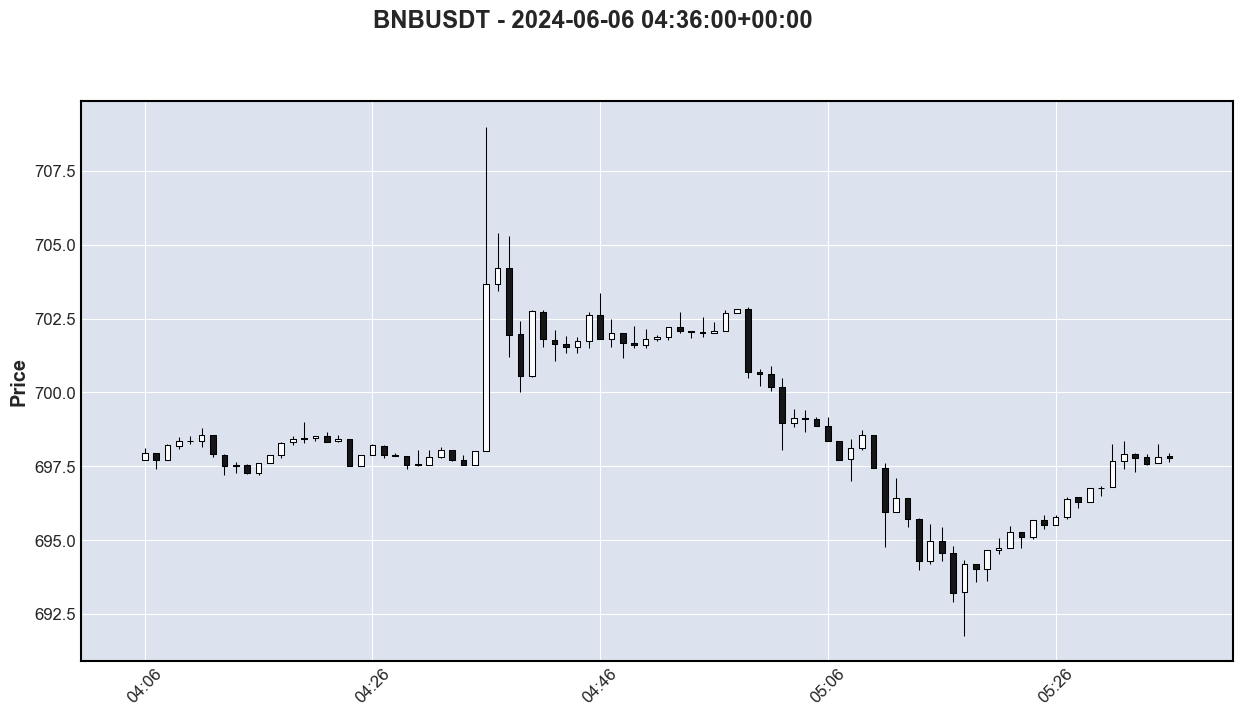

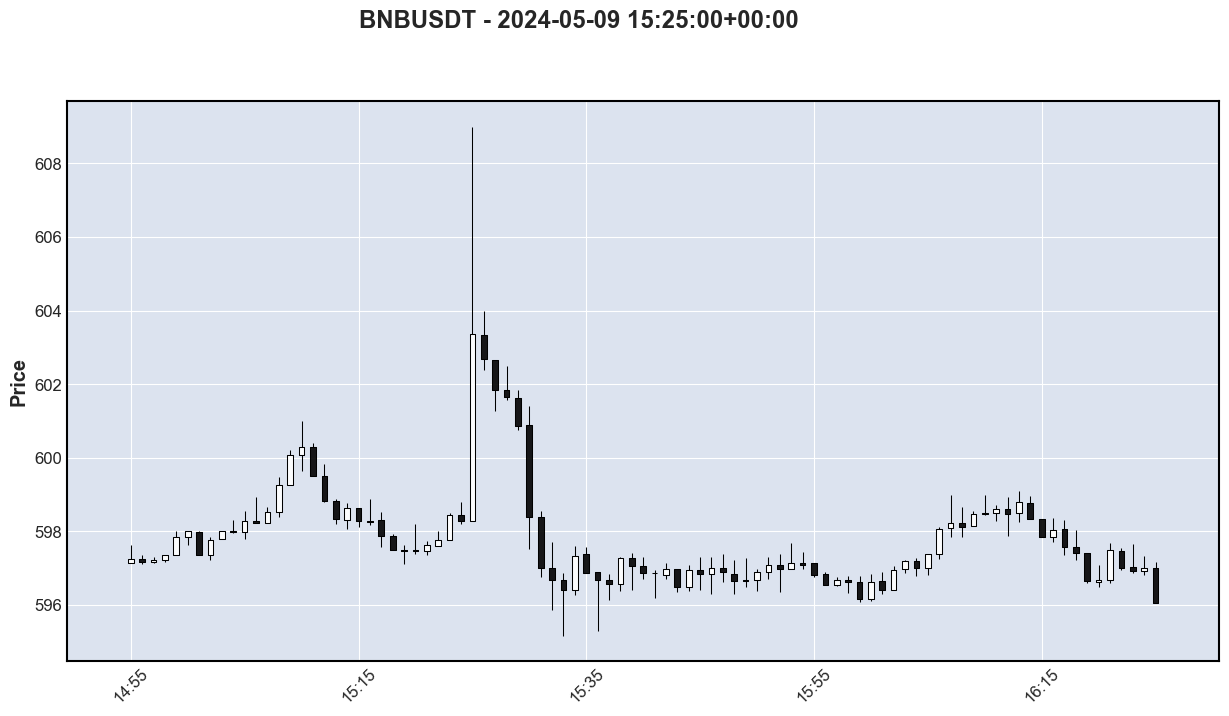

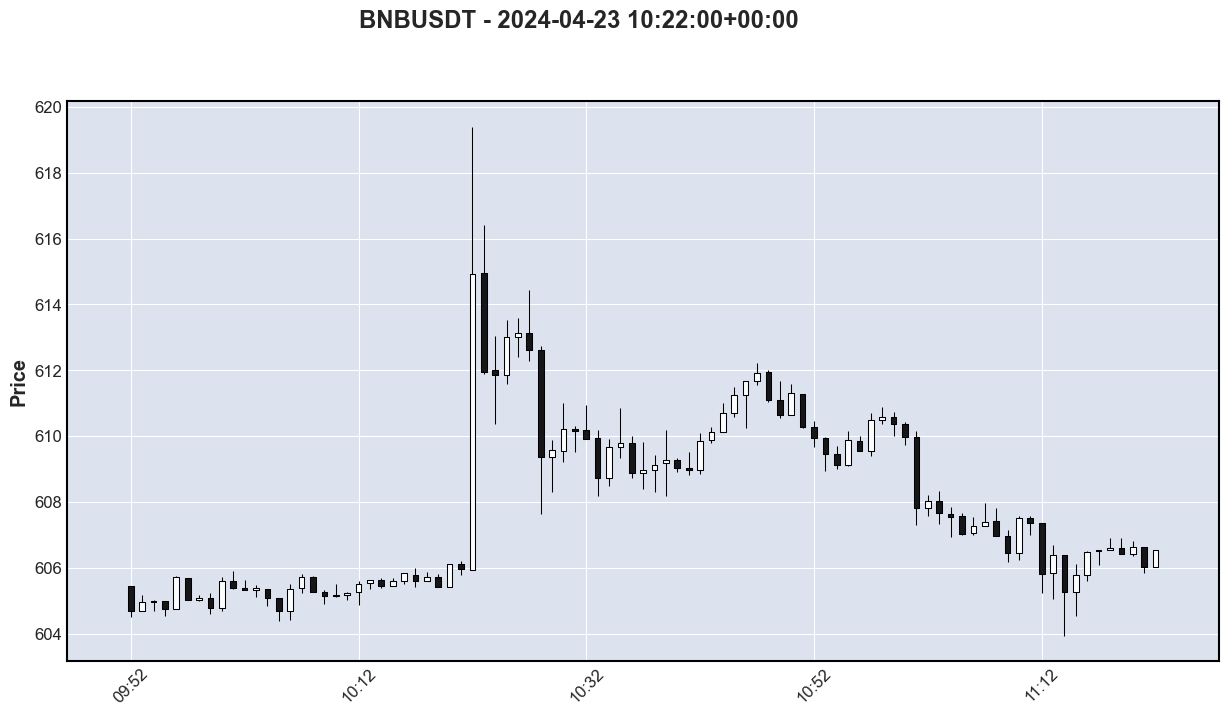

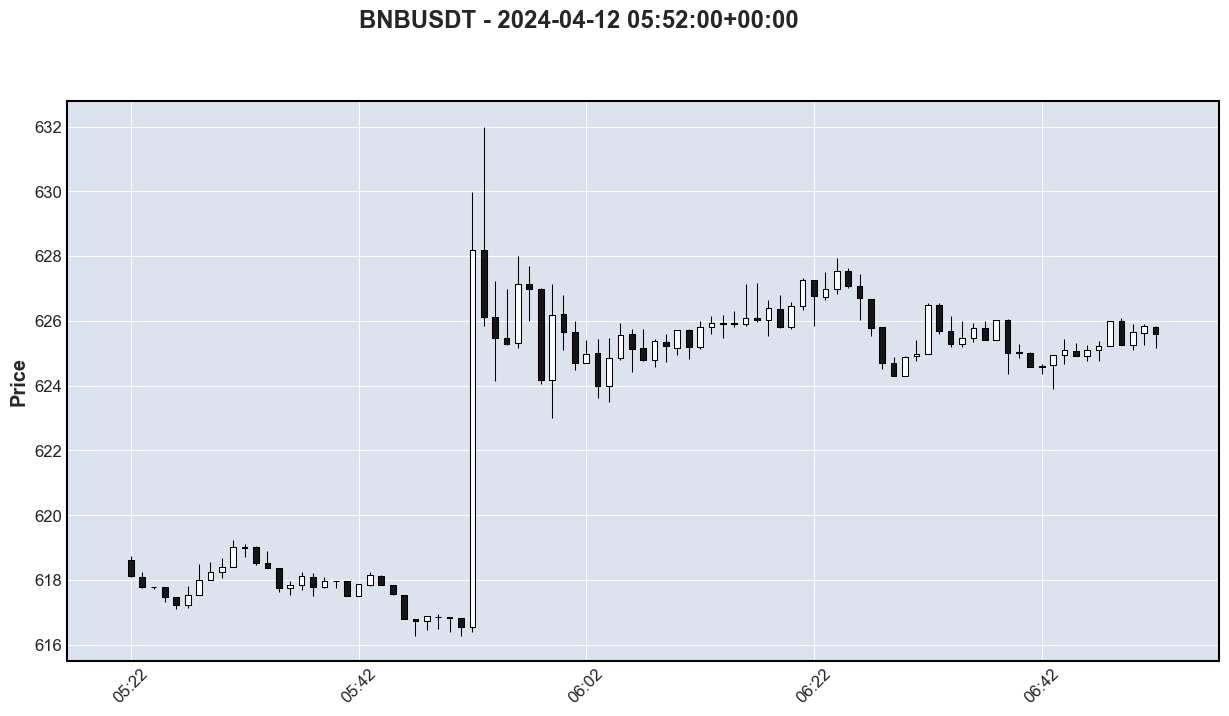

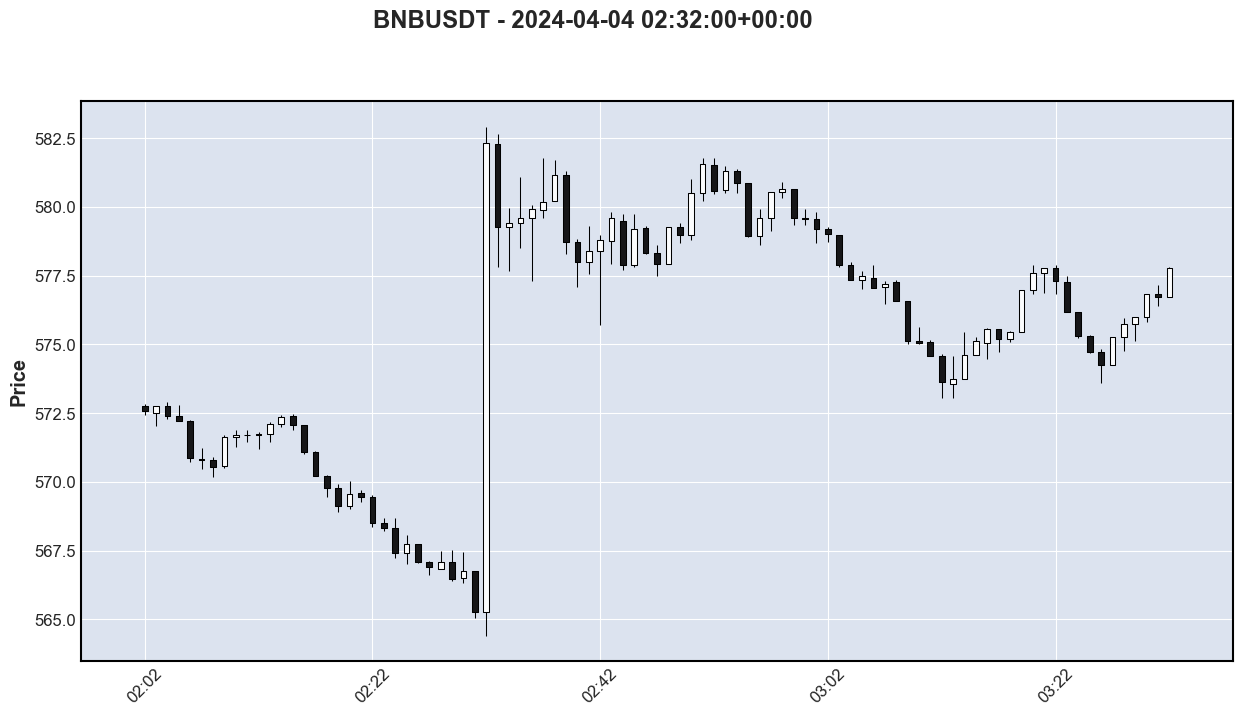

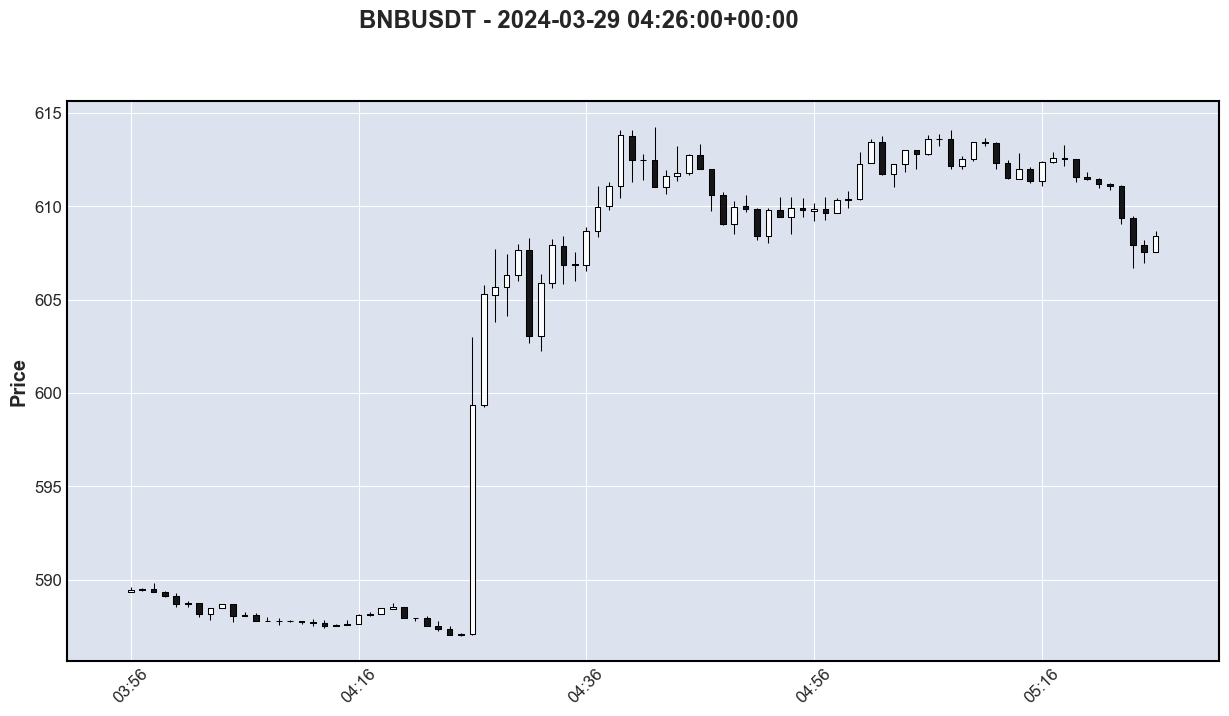

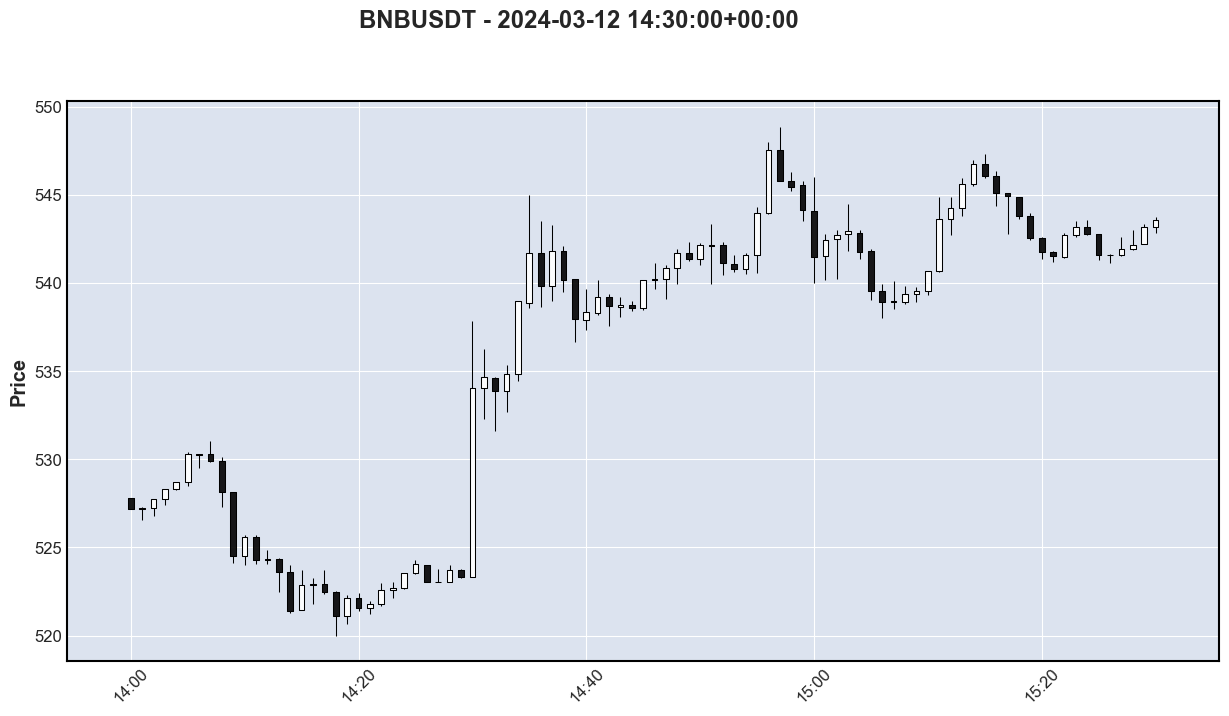

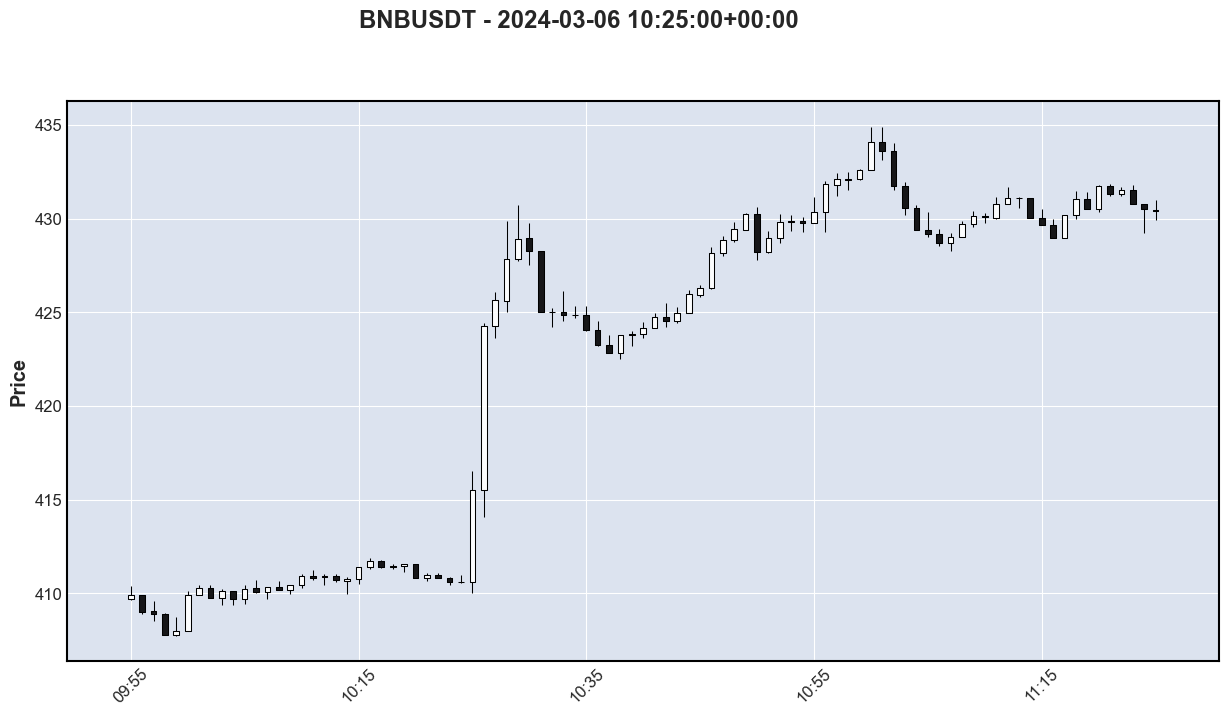

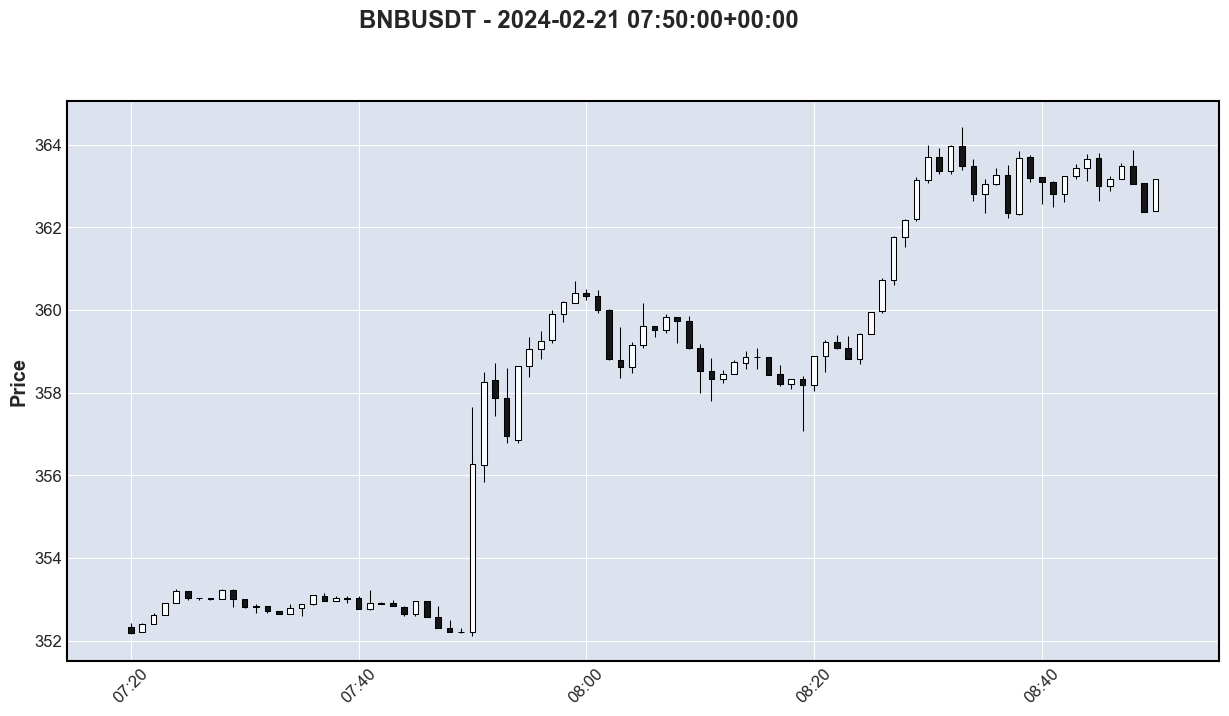

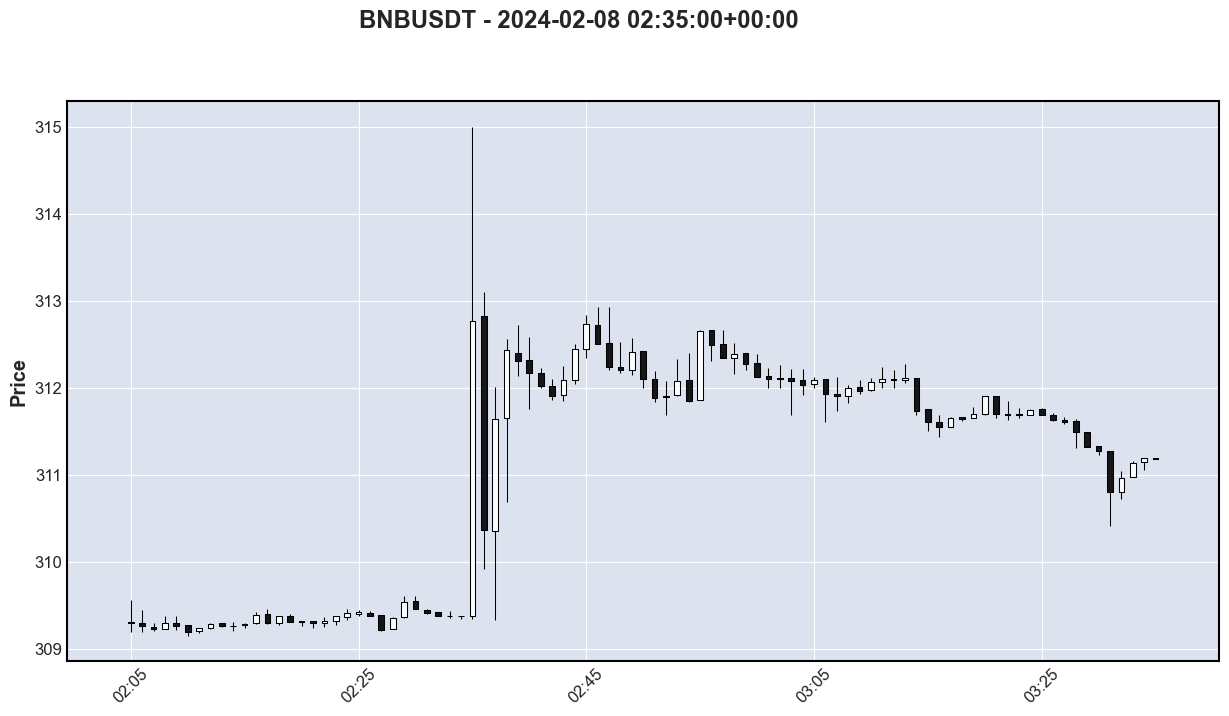

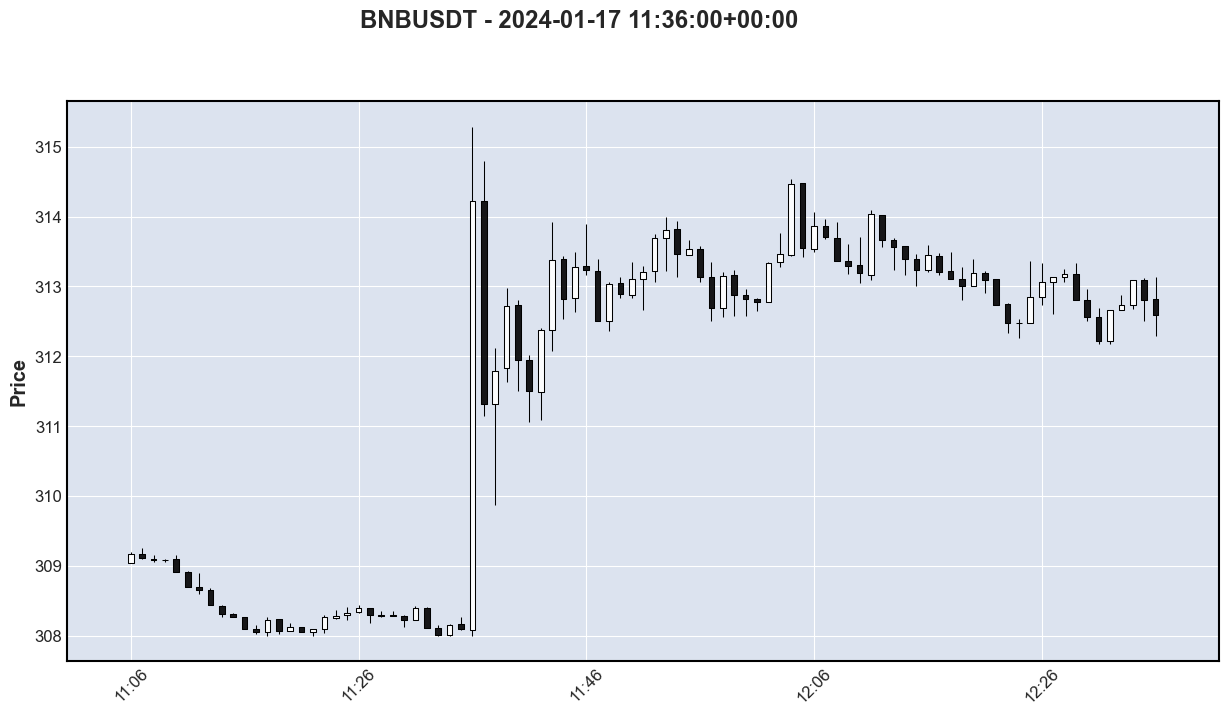

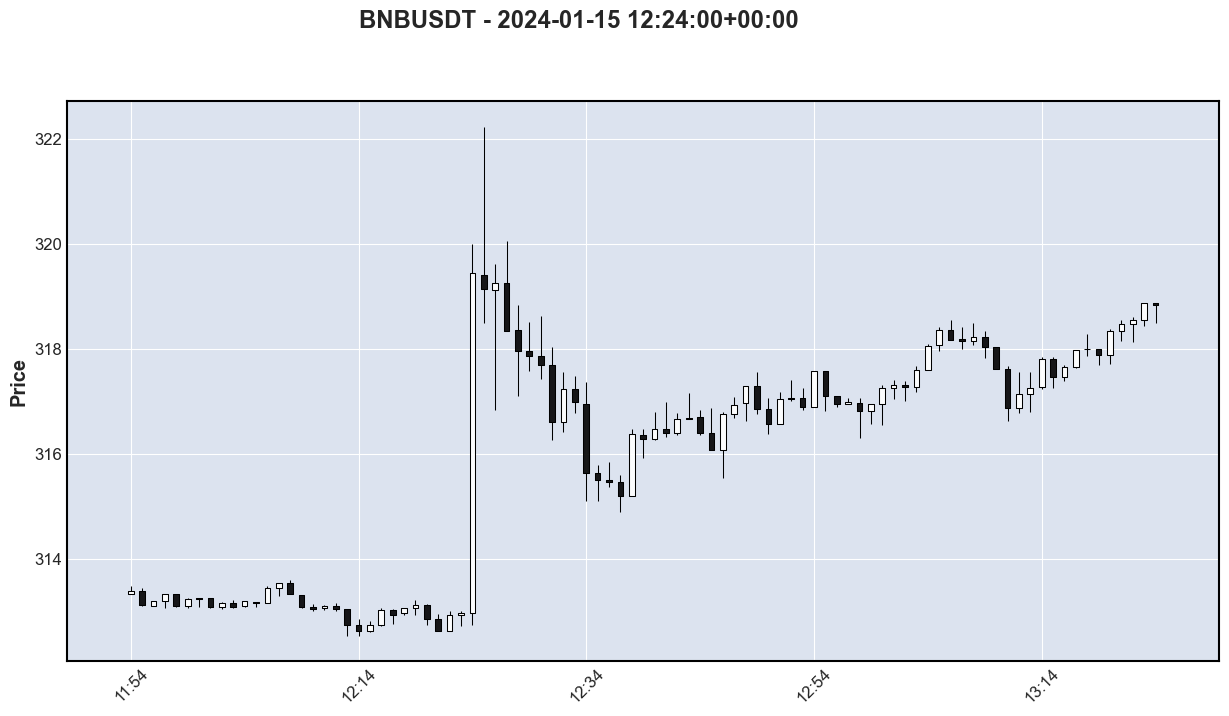

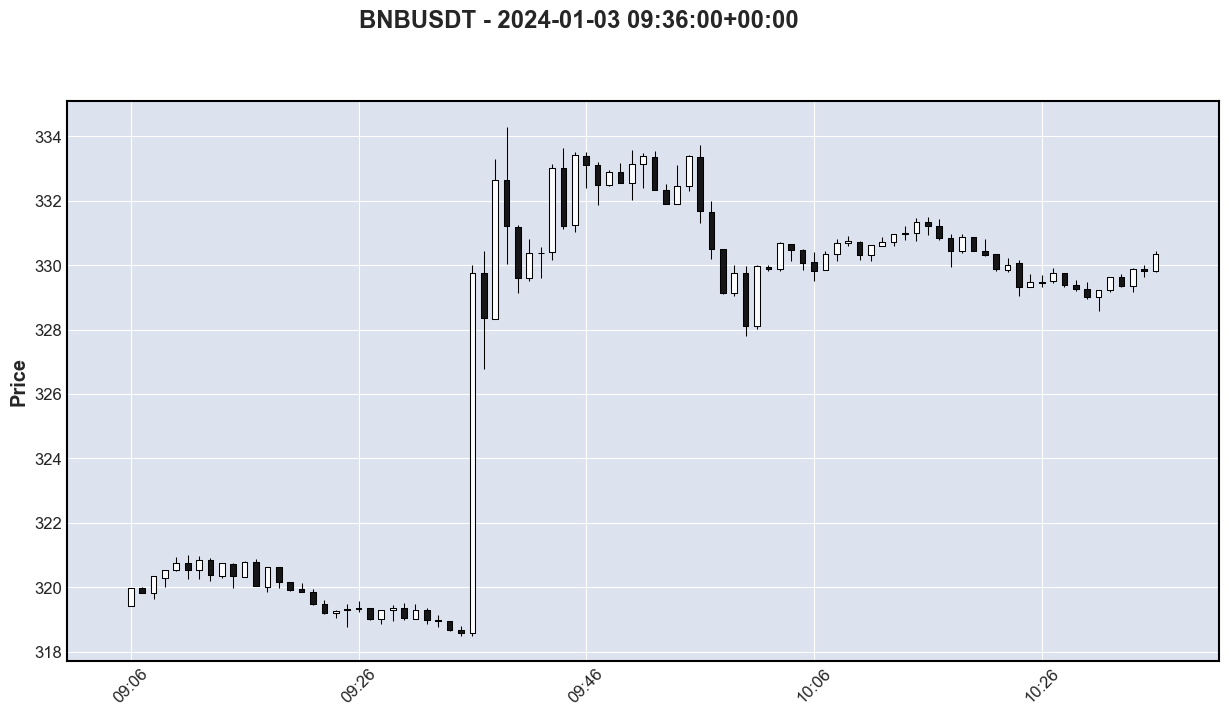

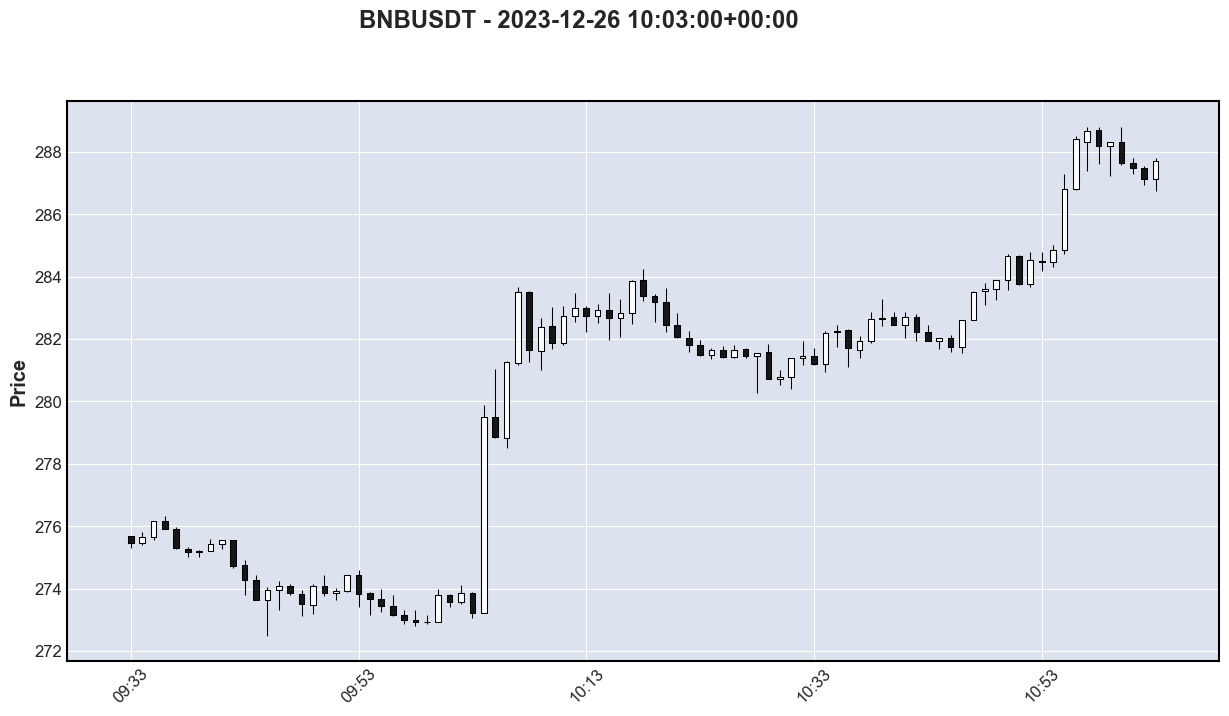

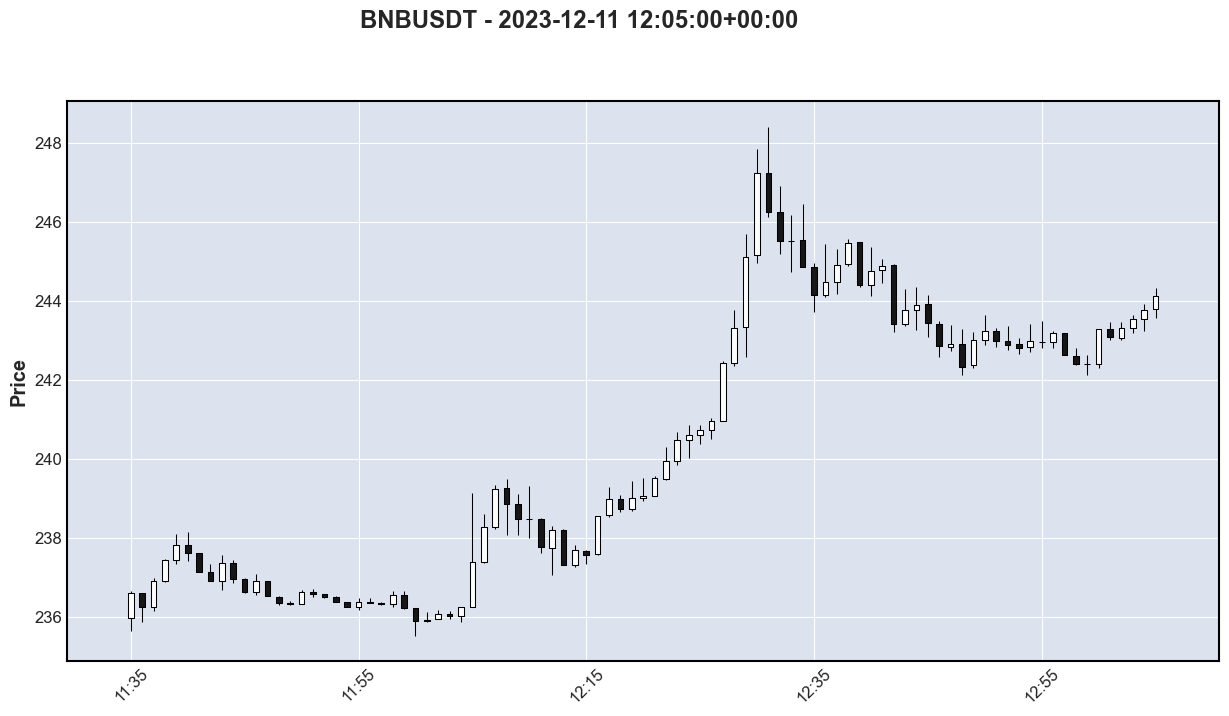

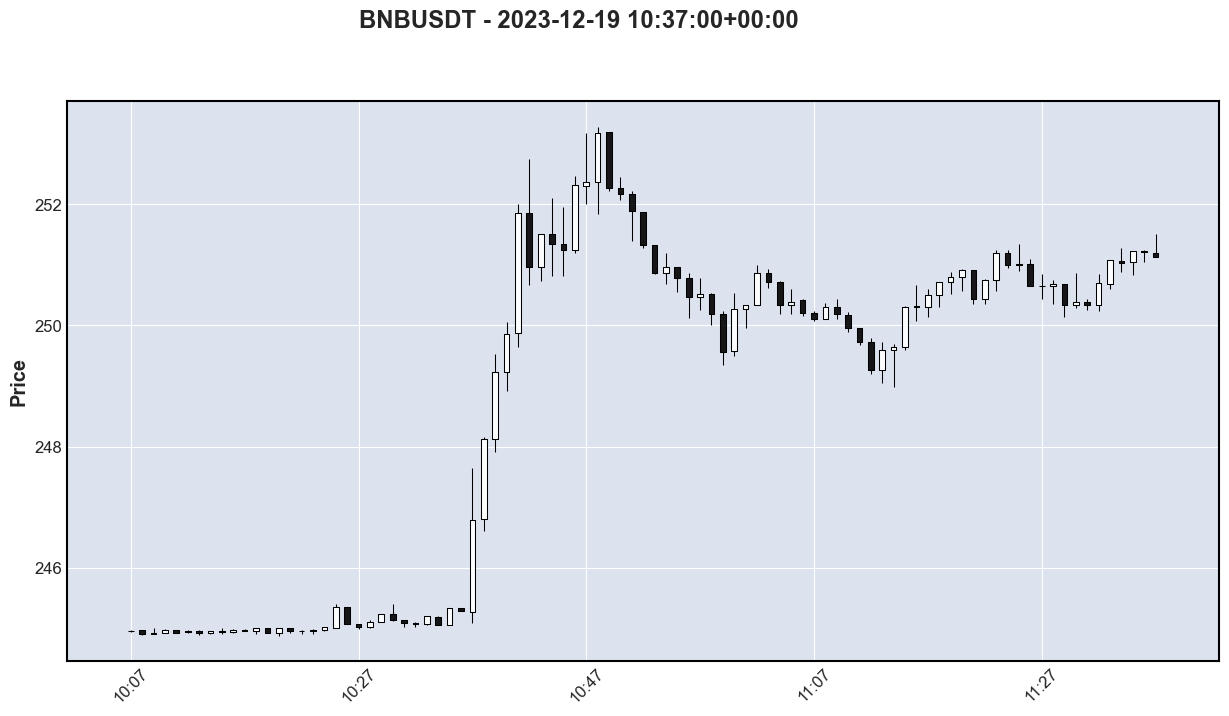

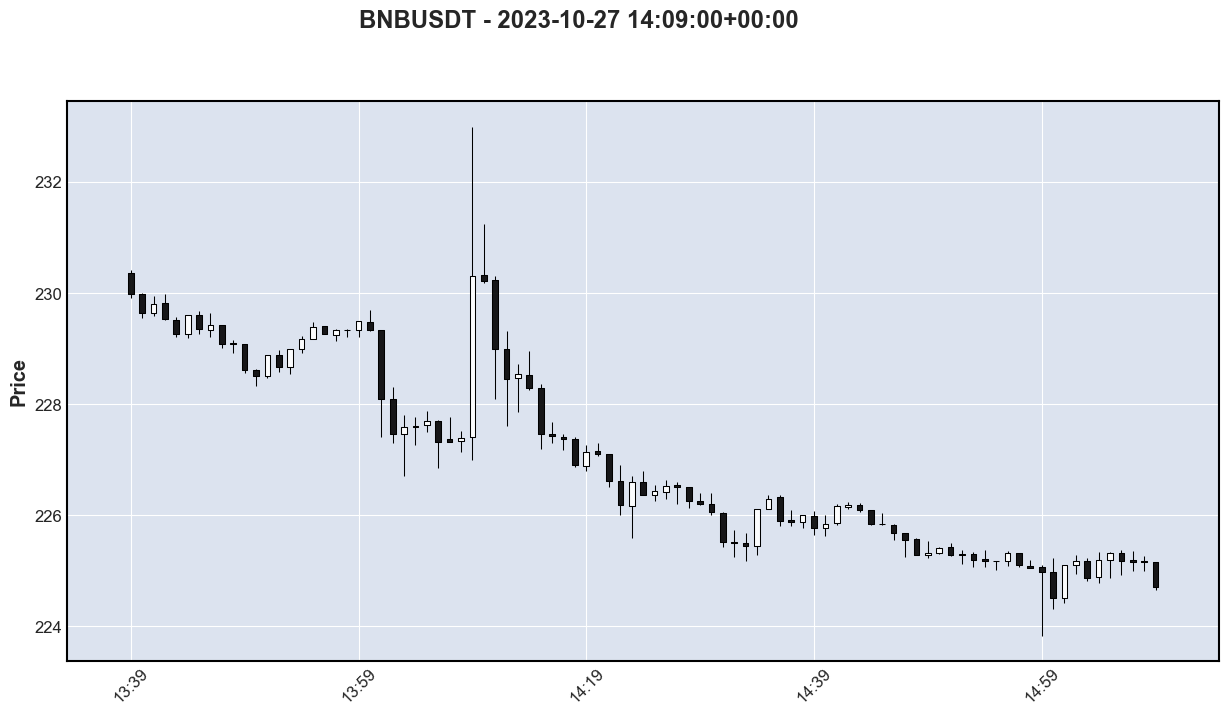

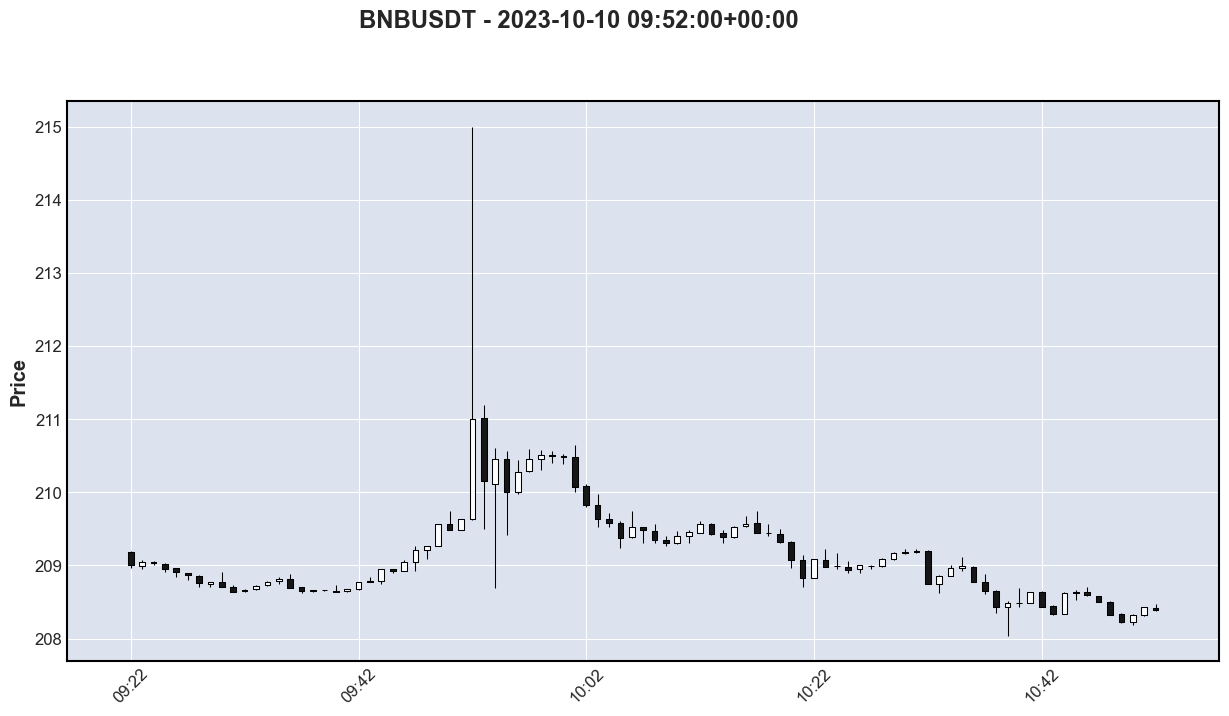

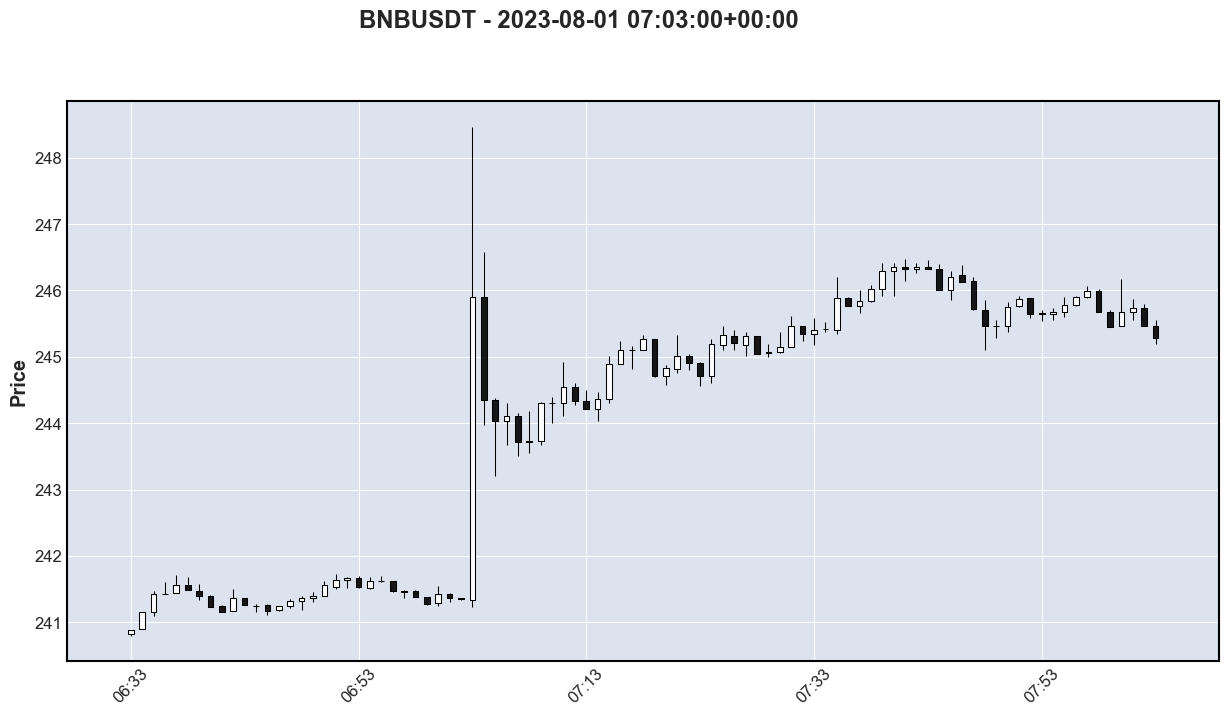

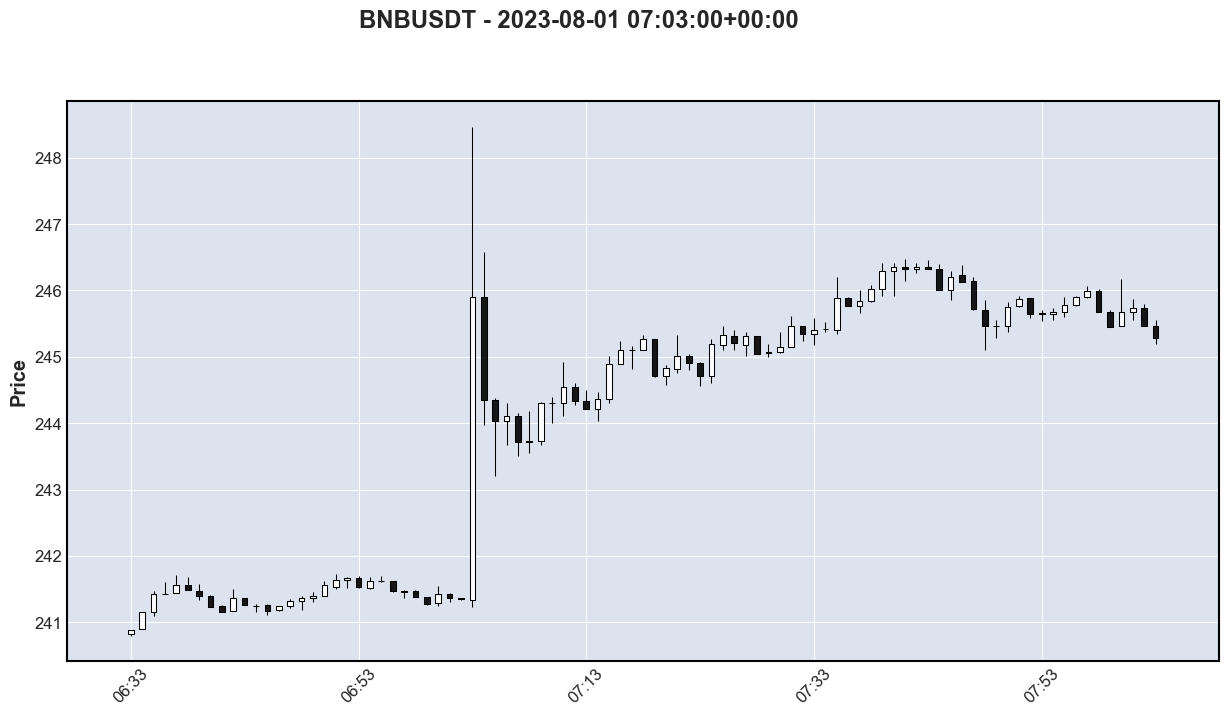

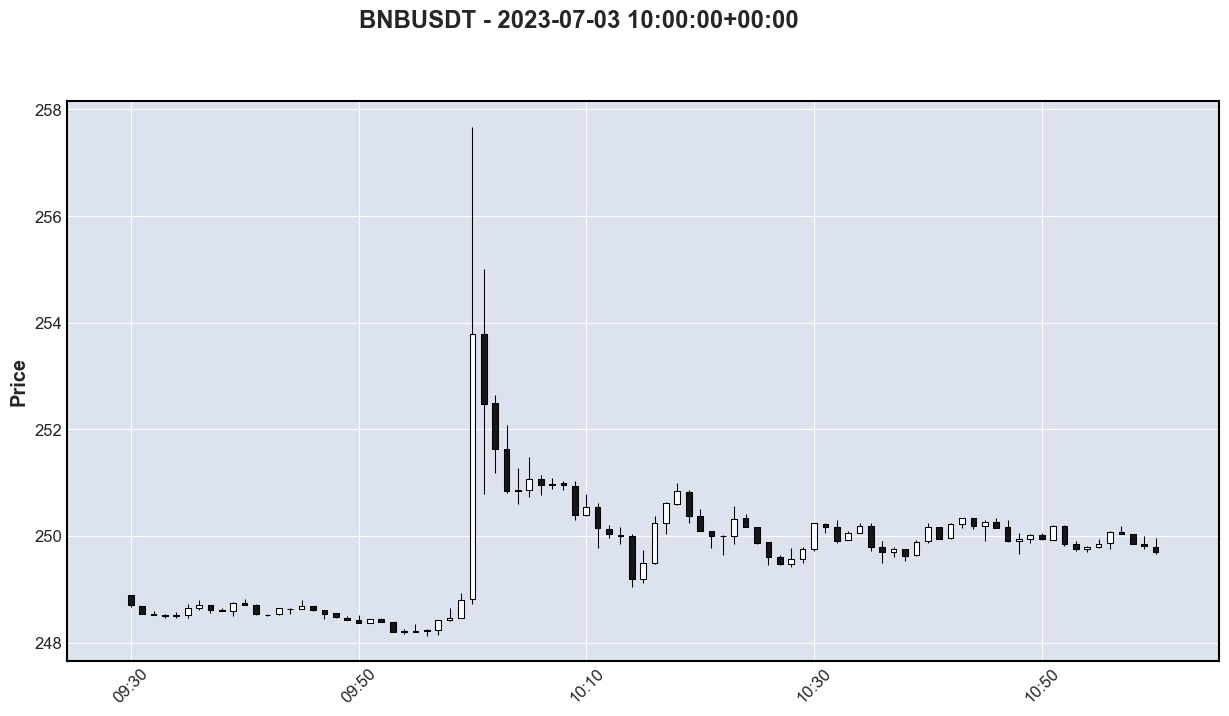

In [11]:
from binanceVision import BinanceDownloader
import mplfinance as mpf
import matplotlib.pyplot as plt


bd = BinanceDownloader()
ticker = 'BNBUSDT'
for event in events:
    t0 = event['announced']
    date = t0.strftime("%Y-%m-%d")
    df_ohlcv = bd.get_ohlcv_daily_(ticker = ticker, date = date, timeframe = '1m', type='futures')
    df_ohlcv.Time = pd.to_datetime(df_ohlcv.Time, unit='ms', utc=True)
    df_ohlcv.set_index('Time', inplace=True)

    df_ohlcv_ = df_ohlcv[t0-pd.Timedelta(minutes=30):t0+pd.Timedelta(minutes=60)]

    mpf.plot(df_ohlcv_, type='candle', figsize = (16,8), title = f"{ticker} - {t0}");plt.show()


In [3]:
# Get BNB OHLCV
from binanceVision import BinanceDownloader
bd = BinanceDownloader()
df = bd.get_ohlcv_monthly('BNBUSDT', '1h', 'futures')
df.Time = pd.to_datetime(df.Time, utc=True, unit='ms')
df.set_index('Time', inplace=True, drop=True)

In [4]:
bd = BinanceDownloader()
df_btc = bd.get_ohlcv_monthly('BTCUSDT', '1h', 'futures')
df_btc.Time = pd.to_datetime(df_btc.Time, utc=True, unit='ms')
df_btc.set_index('Time', inplace=True, drop=True)

In [21]:
lrets = []
leverage = 1
for event in events:
    t1 = event['start'] - pd.Timedelta(hours = 0)

    t0 = np.searchsorted(df.index,event['announced'])
    t0 = df.index[t0]

    if (t1-t0) > pd.Timedelta(hours = 24):
        t0 = t1 - pd.Timedelta(hours = 24)

    ret = round((df.Open.loc[t1] / df.Close.loc[t0] - 1 - 0.001)*leverage,3)

    low = round(min(df.Low[t0:t1])/df.Open.loc[t0]-1,3)
    high = round(max(df.High[t0:t1])/df.Open.loc[t0]-1,3)
    print(event['ticker'],  (t1-t0).total_seconds()/3600,"ret:",ret, "low:", low, "high:", high)
    lrets.append(np.log(ret+1))
    

io 19.0 ret: 0.018 low: -0.013 high: 0.032
not 24.0 ret: 0.003 low: -0.008 high: 0.011
rez 13.0 ret: 0.001 low: -0.015 high: 0.001
omni 18.0 ret: -0.049 low: -0.1 high: 0.003
saga 21.0 ret: 0.012 low: -0.011 high: 0.03
ena 19.0 ret: 0.001 low: -0.013 high: 0.017
ethfi 24.0 ret: 0.182 low: -0.01 high: 0.18
aevo 24.0 ret: 0.102 low: -0.015 high: 0.111
portal 16.0 ret: 0.041 low: -0.009 high: 0.071
pixel 21.0 ret: 0.023 low: -0.006 high: 0.026
alt 24.0 ret: 0.015 low: -0.012 high: 0.019
manta 11.0 ret: -0.005 low: -0.017 high: 0.009
xai 24.0 ret: 0.029 low: -0.016 high: 0.032
ai 24.0 ret: 0.1 low: -0.042 high: 0.101
ace 24.0 ret: 0.016 low: -0.004 high: 0.043
nfp 13.0 ret: 0.001 low: -0.002 high: 0.019
Meme 9.0 ret: -0.009 low: -0.018 high: 0.008
NTRN 14.0 ret: 0.001 low: -0.02 high: 0.001
cyber 16.0 ret: 0.005 low: -0.013 high: 0.014
sei 16.0 ret: 0.005 low: -0.013 high: 0.014
pendle 14.0 ret: -0.014 low: -0.015 high: 0.036


In [22]:
lrets = np.array(lrets)
print(lrets.mean()/lrets.std()*np.sqrt(len(lrets)))
print(lrets.sum())

2.156405183839221
0.4502591596591015


In [132]:
lrets = []
leverage = 1
for event in events:
    t1 = random.choice(df.index)
    t0 = t1 - pd.Timedelta(hours = 24)

    ret = (df.Open.loc[t1] / df.Open.loc[t0] - 1 - 0.001)*leverage
    ret_btc = df_btc.Open.loc[t1] / df_btc.Open.loc[t0] - 1 - 0.001
    print(event['ticker'],event['announced'], t0, ret, (t1-t0).total_seconds()/3600)
    lrets.append(np.log(ret+1))
    

io 2024-06-06 04:36:00+00:00 2023-06-26 08:00:00+00:00 0.003332464036342243 24.0
not 2024-05-09 15:25:00+00:00 2023-09-24 12:00:00+00:00 -0.013470365101943993 24.0
rez 2024-04-23 10:22:00+00:00 2024-01-30 01:00:00+00:00 -0.011055109736053392 24.0
omni 2024-04-12 05:52:00+00:00 2024-05-20 18:00:00+00:00 0.06524142163218027 24.0
saga 2024-04-04 02:32:00+00:00 2024-02-29 20:00:00+00:00 -0.0001633240642765479 24.0
ena 2024-03-29 04:26:00+00:00 2023-09-14 15:00:00+00:00 -0.013304669224291188 24.0
ethfi 2024-03-12 14:30:00+00:00 2023-11-17 00:00:00+00:00 0.007854660022239668 24.0
aevo 2024-03-06 10:25:00+00:00 2024-01-08 10:00:00+00:00 0.018696816913717274 24.0
portal 2024-02-21 07:50:00+00:00 2023-11-19 03:00:00+00:00 0.016495585034293048 24.0
pixel 2024-02-08 02:35:00+00:00 2024-03-02 16:00:00+00:00 0.012382352941176511 24.0
alt 2024-01-17 11:36:00+00:00 2024-05-15 15:00:00+00:00 -0.021597891826507842 24.0
manta 2024-01-15 12:24:00+00:00 2024-02-03 20:00:00+00:00 0.01611735713334228 24.0
x

In [135]:
lrets = np.array(lrets)
print(lrets.mean()/lrets.std()*np.sqrt(len(lrets)))
print(lrets.sum())

1.3035300889455939
0.1140626132426878


array([ 0.00332692, -0.01356191, -0.01111667,  0.06320146, -0.00016334,
       -0.01339397,  0.00782397,  0.01852418,  0.01636101,  0.01230632,
       -0.02183454,  0.01598885,  0.00314559,  0.01394541,  0.00717997,
       -0.02713798,  0.00348824,  0.02818233, -0.00402447, -0.00718739,
        0.01900863])